# Human Activity Recognition Using Convolution Neural Network with Sliding Window

## Subject 1 Data import

1. Import pandas,numpy and matplotlib libraries.
2. Reading the sensor values for subject 1 and subject 2

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_sub1=pd.read_csv('df_sub1.csv')

## Subject 2 Data import

In [131]:
df_sub2=pd.read_csv('df_sub2.csv')

In [132]:
df_sub1=pd.DataFrame(df_sub1)
df_sub2=pd.DataFrame(df_sub2)

## Concat the dataframes of 2 subjects

In [133]:
frames=[df_sub1,df_sub2]
combined_frame=pd.concat(frames)

In [134]:
combined_frame.loc[combined_frame['Label'] == 'dribbling']

E1        E2        E3          E4          E5         E6  \
32174 -0.616943 -0.362305 -0.178467 -163.353659 -113.414634  38.871951   
32175 -0.607544 -0.351288 -0.175659 -163.544207 -113.433689  39.249238   
32176 -0.598145 -0.340271 -0.172852 -163.734756 -113.452744  39.626524   
32177 -0.579346 -0.318237 -0.167236 -164.115854 -113.490854  40.381098   
32178 -0.569946 -0.307220 -0.164429 -164.306402 -113.509909  40.758384   
...         ...       ...       ...         ...         ...        ...   
46785 -0.883362 -0.218109 -0.134979   -4.649390    5.114329  -9.607470   
46786 -0.893066 -0.220947 -0.133545   -3.963415    5.121951  -8.932927   
46787 -0.845459 -0.143799 -0.145996    9.695122    4.939024   1.890244   
46788 -0.843533 -0.139838 -0.148139    9.684959    5.318428   2.063008   
46789 -0.841607 -0.135878 -0.150282    9.674797    5.697832   2.235772   

           Label       A1       A2       A3       W1       W2       W3  
32174  dribbling -0.86426 -0.49463  0.34448  0.50708  0.84814  0.93628  
32175  dribbling -0.85718 -0.49585  0.30151  0.48926  0.81689  0.90112  
32176  dribbling -0.93701 -0.39648  0.08472  0.48022  0.75684  0.85718  
32177  dribbling -1.00317 -0.24487 -0.07593  0.43359  0.66968  0.84961  
32178  dribbling -1.05054 -0.13062 -0.13770  0.42041  0.64136  0.77393  
...          ...      ...      ...      ...      ...      ...      ...  
46785  dribbling -1.70679 -0.06372  1.43555 -0.03516  0.17358  1.29932  
46786  dribbling -1.58447 -0.11304  1.28076 -0.02881  0.14282  1.31006  
46787  dribbling -1.05371 -0.17627  0.80176 -0.02661  0.08984  1.31104  
46788  dribbling -0.88794 -0.34277  0.70703 -0.02856  0.02100  1.29346  
46789  dribbling -0.89038 -0.44043  0.65186 -0.02661 -0.02441  1.27417  

[14616 rows x 13 columns]

In [135]:
p=plt.figure(1)
df_sub1['Label'].value_counts().plot(kind='bar',color='green')
plt.xlabel('Activity')
plt.ylabel('value counts')
plt.title('Subject 1 Activity Data')

q=plt.figure(2)
df_sub2['Label'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Activity')
plt.ylabel('value counts')
plt.title('Subject 2 Activity Data')
plt.show()

r=plt.figure(3)
combined_frame['Label'].value_counts().plot(kind='bar',color='purple')
plt.xlabel('Activity')
plt.ylabel('value counts')
plt.title('Combined Activity Data')
plt.show()

## Creating data frames for each subject

In [143]:
walking= df_sub1[df_sub1['Label']=='walking'].copy()
layup= df_sub1[df_sub1['Label']=='layup'].copy()
running= df_sub1[df_sub1['Label']=='running'].copy()
shooting= df_sub1[df_sub1['Label']=='shooting'].copy()
null= df_sub1[df_sub1['Label']=='null'].copy()
Subject1_data=pd.DataFrame()
Subject1_data=Subject1_data.append([walking,layup,running,shooting,null])

In [144]:
walking= df_sub2[df_sub2['Label']=='walking'].copy()
layup= df_sub2[df_sub2['Label']=='layup'].copy()
running= df_sub2[df_sub2['Label']=='running'].copy()
shooting= df_sub2[df_sub2['Label']=='shooting'].copy()
null= df_sub2[df_sub2['Label']=='null'].copy()
Subject2_data=pd.DataFrame()
Subject2_data=Subject2_data.append([walking,layup,running,shooting,null])


## Creating Data Frame for the combined data of both the subjects

In [145]:
walking= combined_frame[combined_frame['Label']=='walking'].copy()
layup= combined_frame[combined_frame['Label']=='layup'].copy()
running= combined_frame[combined_frame['Label']=='running'].copy()
shooting= combined_frame[combined_frame['Label']=='shooting'].copy()
dribbling= combined_frame[combined_frame['Label']=='dribbling'].copy()
null= combined_frame[combined_frame['Label']=='null'].copy()
Combined_data=pd.DataFrame()
Combined_data=Combined_data.append([walking,layup,running,shooting,dribbling,null])

In [146]:
Combined_data['Label'].value_counts()

walking      24948
layup        23100
running      19824
shooting     17976
dribbling    14616
Name: Label, dtype: int64

## Encoding the labels for training

In [147]:
from sklearn.preprocessing import LabelEncoder

Label1 = LabelEncoder()
Combined_data['label']=Label1.fit_transform(Combined_data['Label'])
Label2 = LabelEncoder()
Subject1_data['label']=Label2.fit_transform(Subject1_data['Label'])
Subject2_data['label']=Label2.fit_transform(Subject2_data['Label'])
Label1.classes_,Label2.classes_

(array(['dribbling', 'layup', 'running', 'shooting', 'walking'],
       dtype=object),
 array(['layup', 'running', 'shooting', 'walking'], dtype=object))

In [148]:
column = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'A1', 'A2', 'A3', 'W1', 'W2', 'W3']
X=Combined_data[column]
Y=Combined_data['label']

Xs1=Subject1_data[column]
Ys1=Subject1_data['label']

Xs2=Subject2_data[column]
Ys2=Subject2_data['label']

## Normalizing the datasets

### Creating 2 datasets one with normalized data and one without normalization for further training and validation

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(X)
y=scaler.fit_transform(Xs1)
z=scaler.fit_transform(Xs2)

Combined_data_scaled=pd.DataFrame(data=x, columns=column)
Combined_data_scaled['label']=Y.values

Subject1_data=pd.DataFrame(data=y, columns=column)
Subject1_data['label']=Ys1.values

Subject2_data=pd.DataFrame(data=z, columns=column)
Subject2_data['label']=Ys2.values

## Constructing the Frames/Windows

### The function frames(dataFrame,frameSize,hopsize) takes the parameters and returns the lists(ie . frames and labels) which are collection of frames and labels differing by the hopsize to get data for the duration of activity
### Here the duration is taken to be 1 seconds . This implies that each frame(list) has the sensor data for a duration of 1 seconds. Also each frame in frames differs by 0.5 seconds as calculated in the previous cell 
     

In [150]:
import scipy.stats as stats

frequency=100
frame_size = frequency*1
hopsize = 50

In [151]:
def frames(dataFrame,frameSize,hopsize):
    featureCount=12
    frames=[]
    labels=[]
    for i in range(0,len(dataFrame)-frameSize,hopsize):
        E1=dataFrame['E1'].values[i : i+frameSize]
        E2=dataFrame['E2'].values[i : i+frameSize]
        E3=dataFrame['E3'].values[i : i+frameSize]
        E4=dataFrame['E4'].values[i : i+frameSize]
        E5=dataFrame['E5'].values[i : i+frameSize]
        E6=dataFrame['E6'].values[i : i+frameSize]
        A1=dataFrame['A1'].values[i : i+frameSize]
        A2=dataFrame['A2'].values[i : i+frameSize]
        A3=dataFrame['A3'].values[i : i+frameSize]
        W1=dataFrame['W1'].values[i : i+frameSize]
        W2=dataFrame['W2'].values[i : i+frameSize]
        W3=dataFrame['W3'].values[i : i+frameSize]


        label= stats.mode(dataFrame['label'][i : i+frameSize])[0][0]
        frames.append([E1, E2, E3, E4, E5, E6, A1, A2, A3, W1, W2, W3])
        labels.append(label)
    
    frames=np.asarray(frames).reshape(-1,frameSize,featureCount)
    labels=np.asarray(labels)
    return frames,labels



In [152]:
X,y = frames(Combined_data,frame_size,hopsize)
X_S1,y_S1=frames(Subject1_data,frame_size,hopsize)
X_S2,y_S2=frames(Subject2_data,frame_size,hopsize)

X_scaled,y_scaled = frames(Combined_data_scaled,frame_size,hopsize)


In [153]:
Subject2_data['label'].value_counts()

0    12600
3    12432
1    10332
2     7056
Name: label, dtype: int64

### Here we are getting 500 frames with each frame of size (500,12) i.e 500 entries with 12 features(classes) and the corresponding labels. That is each frame has a distinct label which is calculated with the help of taking mode of labels for the activity as in previous cell

In [154]:
X.shape , y.shape , X_S1.shape, y_S1.shape ,X_S2.shape , y_S2.shape

((2008, 100, 12), (2008,), (867, 100, 12), (867,), (847, 100, 12), (847,))

## Train Test Split

### Train test split for the combined and non combined data of the subjects

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y , test_size=0.3,random_state=0, stratify= y)
X_s1_train,X_s1_test,y_s1_train,y_s1_test= train_test_split(X_S1,y_S1 , test_size=0.3,random_state=0, stratify= y_S1)
X_s2_train,X_s2_test,y_s2_train,y_s2_test= train_test_split(X_S2,y_S2, test_size=0.3,random_state=0, stratify= y_S2)


X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y_scaled , test_size=0.3,random_state=0, stratify= y_scaled)

In [156]:
X_train.shape,X_test.shape , X_s1_train.shape,X_s1_test.shape ,X_s2_train.shape,X_s2_test.shape 

((1405, 100, 12),
 (603, 100, 12),
 (606, 100, 12),
 (261, 100, 12),
 (592, 100, 12),
 (255, 100, 12))

The model is implementing Conv2D layer and hence it requires data of 3 dimensions at least. The train and testing data is reshaped below

In [157]:
## Unscaled Data
X_train=X_train.reshape(1405, 100, 12, 1)
X_test=X_test.reshape(603, 100, 12,1)

X_s1_train=X_s1_train.reshape(606, 100, 12, 1)
X_s1_test=X_s1_test.reshape(261, 100, 12,1)

X_s2_train=X_s2_train.reshape(592, 100, 12, 1)
X_s2_test=X_s2_test.reshape(255, 100, 12,1)

X_S1=X_S1.reshape(867,100,12,1)
X_S2=X_S2.reshape(847,100,12,1)

## Scaled Date for the combined data 
X_train_scaled=X_train_scaled.reshape(1405, 100, 12, 1)
X_test_scaled=X_test_scaled.reshape(603, 100, 12,1)


## Building the model

### Building multiple models with same architecture to evaluate using different datasets defined above .

In [158]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,ReLU,BatchNormalization,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

model1 = Sequential()
model1.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(100,12,1)))

model1.add(Dropout(0.3))

model1.add(Conv2D(32,(2,2),activation='relu'))

model1.add(Dropout(0.5))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))

model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))

model1.add(Dense(6,activation='softmax'))

model1.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [159]:
model2 = Sequential()
model2.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(100,12,1)))

model2.add(Dropout(0.3))

model2.add(Conv2D(32,(2,2),activation='relu'))

model2.add(Dropout(0.5))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))

model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))

model2.add(Dense(6,activation='softmax'))

model2.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [160]:
model3 = Sequential()
model3.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(100,12,1)))

model3.add(Dropout(0.3))

model3.add(Conv2D(32,(2,2),activation='relu'))

model3.add(Dropout(0.5))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))

model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))

model3.add(Dense(6,activation='softmax'))

model3.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [161]:
model6 = Sequential()
model6.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(100,12,1)))

model6.add(Dropout(0.3))

model6.add(Conv2D(32,(2,2),activation='relu'))

model6.add(Dropout(0.5))

model6.add(Flatten())

model6.add(Dense(128, activation='relu'))

model6.add(Dropout(0.5))
model6.add(Dense(64, activation='relu'))

model6.add(Dense(6,activation='softmax'))

model6.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [162]:
model7 = Sequential()
model7.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(100,12,1)))

model7.add(Dropout(0.3))

model7.add(Conv2D(32,(2,2),activation='relu'))

model7.add(Dropout(0.5))

model7.add(Flatten())

model7.add(Dense(128, activation='relu'))

model7.add(Dropout(0.5))
model7.add(Dense(64, activation='relu'))

model7.add(Dense(6,activation='softmax'))

model7.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Plotting the learning curve

In [163]:
import matplotlib.pyplot as plt
def plotCurve(history,epochs):
    epoc_range=range(1,epochs+1)
    plt.plot(epoc_range,history.history['accuracy'])
    plt.plot(epoc_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Val'])
    plt.show()


    plt.plot(epoc_range,history.history['loss'])
    plt.plot(epoc_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Val'])
    plt.show()




In [164]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

def plt_confusion_matrix(model,X_test,y_test,Label=Label1):
    y_pred=model.predict_classes(X_test)
    cmatrix=confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat=cmatrix,class_names=Label.classes_, show_normed=True,figsize=(7,7))

In [165]:
# #All metric
# import tensorflow.keras as Keras
# def recall(y_true, y_pred):
#     """Recall metric.
#     Only computes a batch-wise average of recall.
#     Computes the recall, a metric for multi-label classification of
#     how many relevant items are selected.
#     """
#     true_positives = np.sum(np.round(np.clip(y_true * y_pred, 0, 1)))
#     possible_positives = np.sum(np.round(np.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + Keras.backend.epsilon())
#     return recall

# def precision_m(y_true, y_pred):
#     true_positives = np.sum(
#         np.round(np.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = np.sum(
#         np.round(np.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + Keras.backend.epsilon())
#     return precision

# def f1_m(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true, y_pred)
#     return 2 * ((precision * recall) / (precision + recall + Keras.backend.epsilon()))

In [166]:
from sklearn.metrics import precision_score,recall_score,f1_score
def prec_f1_recall(model,X_test,y_test):
    y_pred=model.predict_classes(X_test)
    recall1= recall_score(y_test,y_pred,average='macro',zero_division=1)
    prec=precision_score(y_test,y_pred,average='macro',zero_division=1)
    f1_m= f1_score(y_test,y_pred,average='macro',zero_division=1)
    print("Precision :",{prec},"recall :",{recall1},"F1 Score :",{f1_m})

## Training the model using Cross Subject Validation

### Here the evaluation is done but training the model with subject 2 data and validating the data with subject 1. However the validation accuracy is minimal.

In [167]:
history_cross_subject_validation=model1.fit(X_S1,y_S1,epochs=15,validation_data=(X_S2,y_S2),verbose=1)

Epoch 1/15
28/28 [==============================] - 1s 41ms/step - loss: 0.8405 - accuracy: 0.6724 - val_loss: 0.6901 - val_accuracy: 0.7839
Epoch 2/15
28/28 [==============================] - 1s 37ms/step - loss: 0.2072 - accuracy: 0.9377 - val_loss: 0.7531 - val_accuracy: 0.8064
Epoch 3/15
28/28 [==============================] - 1s 37ms/step - loss: 0.1393 - accuracy: 0.9596 - val_loss: 0.6908 - val_accuracy: 0.8335
Epoch 4/15
28/28 [==============================] - 1s 37ms/step - loss: 0.0845 - accuracy: 0.9769 - val_loss: 0.6150 - val_accuracy: 0.8678
Epoch 5/15
28/28 [==============================] - 1s 37ms/step - loss: 0.0919 - accuracy: 0.9712 - val_loss: 0.5820 - val_accuracy: 0.8619
Epoch 6/15
28/28 [==============================] - 1s 38ms/step - loss: 0.0719 - accuracy: 0.9723 - val_loss: 0.5743 - val_accuracy: 0.8666
Epoch 7/15
28/28 [==============================] - 1s 38ms/step - loss: 0.0454 - accuracy: 0.9873 - val_loss: 0.5832 - val_accuracy: 0.8772
Epoch 8/15
28

## Cross Subject Validation Metrics

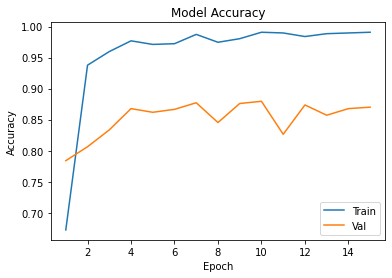

In [168]:
plotCurve(history_cross_subject_validation,15)

In [169]:
plt_confusion_matrix(model1,X_S2,y_S2,Label2)


In [170]:
# y_pred=model.predict_classes(X_test)
prec_f1_recall(model1,X_S2,y_S2)


Precision : {0.860741970497914} recall : {0.872205664640798} F1 Score : {0.8645112309108349}


### Cross Subject Validation interchanging the training and validation data

In [171]:
history_cross_subject_validation2=model6.fit(X_S2,y_S2,epochs=15,validation_data=(X_S1,y_S1),verbose=1)

Epoch 1/15
27/27 [==============================] - 1s 44ms/step - loss: 1.1140 - accuracy: 0.5478 - val_loss: 0.6136 - val_accuracy: 0.7785
Epoch 2/15
27/27 [==============================] - 1s 40ms/step - loss: 0.5087 - accuracy: 0.8323 - val_loss: 0.3107 - val_accuracy: 0.9054
Epoch 3/15
27/27 [==============================] - 1s 38ms/step - loss: 0.2964 - accuracy: 0.9138 - val_loss: 0.3024 - val_accuracy: 0.9066
Epoch 4/15
27/27 [==============================] - 1s 39ms/step - loss: 0.2301 - accuracy: 0.9292 - val_loss: 0.3171 - val_accuracy: 0.9077
Epoch 5/15
27/27 [==============================] - 1s 39ms/step - loss: 0.1758 - accuracy: 0.9339 - val_loss: 0.2459 - val_accuracy: 0.9377
Epoch 6/15
27/27 [==============================] - 1s 40ms/step - loss: 0.1312 - accuracy: 0.9492 - val_loss: 0.3331 - val_accuracy: 0.9262
Epoch 7/15
27/27 [==============================] - 1s 40ms/step - loss: 0.1092 - accuracy: 0.9681 - val_loss: 0.3411 - val_accuracy: 0.9135
Epoch 8/15
27

In [172]:
plotCurve(history_cross_subject_validation2,15)

In [173]:
plt_confusion_matrix(model6,X_S1,y_S1,Label2)

In [174]:
prec_f1_recall(model6,X_S1,y_S1)

Precision : {0.9328596396496183} recall : {0.9333457029670952} F1 Score : {0.9326412328996935}


## Training the model using combined data

### Unscaled Data is used for evaluation

In [175]:
history_combined_Validation=model2.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
44/44 [==============================] - 2s 40ms/step - loss: 4.5912 - accuracy: 0.2754 - val_loss: 1.6261 - val_accuracy: 0.3466
Epoch 2/20
44/44 [==============================] - 2s 36ms/step - loss: 1.6064 - accuracy: 0.3139 - val_loss: 1.4867 - val_accuracy: 0.3897
Epoch 3/20
44/44 [==============================] - 2s 36ms/step - loss: 1.5177 - accuracy: 0.3566 - val_loss: 1.4351 - val_accuracy: 0.4411
Epoch 4/20
44/44 [==============================] - 2s 36ms/step - loss: 1.4500 - accuracy: 0.4285 - val_loss: 1.3141 - val_accuracy: 0.5390
Epoch 5/20
44/44 [==============================] - 2s 36ms/step - loss: 1.3277 - accuracy: 0.4854 - val_loss: 1.1906 - val_accuracy: 0.6053
Epoch 6/20
44/44 [==============================] - 2s 36ms/step - loss: 1.2147 - accuracy: 0.5160 - val_loss: 1.1479 - val_accuracy: 0.5539
Epoch 7/20
44/44 [==============================] - 2s 37ms/step - loss: 1.1282 - accuracy: 0.5466 - val_loss: 0.8773 - val_accuracy: 0.7032
Epoch 8/20
44

## Combined Subject Validation metrics for unscaled data

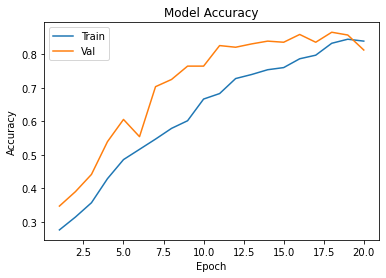

In [176]:
plotCurve(history_combined_Validation,20)

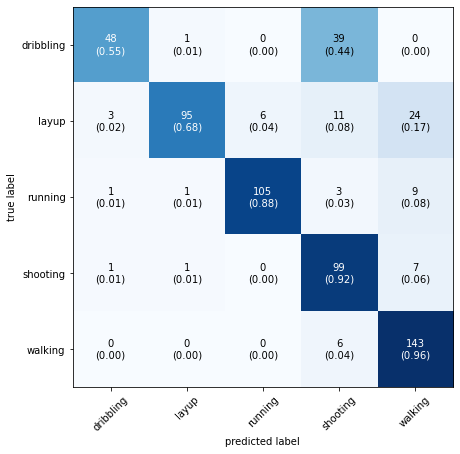

In [177]:
plt_confusion_matrix(model2,X_test,y_test)


In [178]:
prec_f1_recall(model2,X_test,y_test)

Precision : {0.8457994243829624} recall : {0.7975317868663832} F1 Score : {0.8002777982383812}


### Scaled(Normalized Data)

In [179]:
history_combined_Validation_scaled=model3.fit(X_train_scaled,y_train_scaled,epochs=15,validation_data=(X_test_scaled,y_test_scaled),verbose=1)

Epoch 1/15
44/44 [==============================] - 2s 40ms/step - loss: 1.1296 - accuracy: 0.5779 - val_loss: 0.4177 - val_accuracy: 0.9038
Epoch 2/15
44/44 [==============================] - 2s 38ms/step - loss: 0.4809 - accuracy: 0.8434 - val_loss: 0.2404 - val_accuracy: 0.9337
Epoch 3/15
44/44 [==============================] - 2s 36ms/step - loss: 0.3098 - accuracy: 0.9004 - val_loss: 0.1791 - val_accuracy: 0.9386
Epoch 4/15
44/44 [==============================] - 2s 35ms/step - loss: 0.2284 - accuracy: 0.9181 - val_loss: 0.1636 - val_accuracy: 0.9453
Epoch 5/15
44/44 [==============================] - 2s 36ms/step - loss: 0.1498 - accuracy: 0.9480 - val_loss: 0.1433 - val_accuracy: 0.9469
Epoch 6/15
44/44 [==============================] - 2s 35ms/step - loss: 0.1571 - accuracy: 0.9431 - val_loss: 0.1420 - val_accuracy: 0.9519
Epoch 7/15
44/44 [==============================] - 2s 36ms/step - loss: 0.1238 - accuracy: 0.9651 - val_loss: 0.1539 - val_accuracy: 0.9436
Epoch 8/15
44

## Combined Subject Validation Metrics for scaled data

In [180]:
plotCurve(history_combined_Validation_scaled,15)

### The below confusion matrix is plotted for the model trained with normalized data

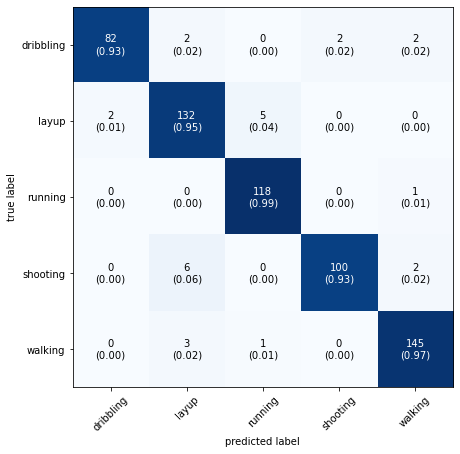

In [181]:
plt_confusion_matrix(model3,X_test_scaled,y_test_scaled)

In [183]:
prec_f1_recall(model3,X_test_scaled,y_test_scaled)

Precision : {0.9595878252045236} recall : {0.9544270793170924} F1 Score : {0.9566265236859264}


## Stratified Cross Validation Approach

### In this approach the data is split into strata, and in each iteration the data is changed for training and validation . This covers the data coverage for all the scenarios . In the section below two models are trained using this approach , one model without normalization of the data and one with the normalized data.

In [184]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
skf.get_n_splits(X, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=2, shuffle=True)


In [185]:

X.shape,y.shape
X=X.reshape(2008,100,12,1)

In [186]:
scores=[]
i=1
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print("Fold : ",i)
    X_train,X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model4 = Sequential()
    model4.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(100,12,1)))

    model4.add(Dropout(0.3))

    model4.add(Conv2D(32,(2,2),activation='relu'))

    model4.add(Dropout(0.5))

    model4.add(Flatten())

    model4.add(Dense(128, activation='relu'))

    model4.add(Dropout(0.5))
    model4.add(Dense(64, activation='relu'))

    model4.add(Dense(6,activation='softmax'))

    model4.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        
    history_stratified_n_fold=model4.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)
    scores.append(model4.evaluate(X_test,y_test))
    i+=1

Fold :  1
Epoch 1/10
51/51 [==============================] - 2s 37ms/step - loss: 3.6788 - accuracy: 0.3001 - val_loss: 1.5961 - val_accuracy: 0.4328
Epoch 2/10
51/51 [==============================] - 2s 36ms/step - loss: 1.5607 - accuracy: 0.3313 - val_loss: 1.5349 - val_accuracy: 0.4701
Epoch 3/10
51/51 [==============================] - 2s 37ms/step - loss: 1.4746 - accuracy: 0.4035 - val_loss: 1.4362 - val_accuracy: 0.5124
Epoch 4/10
51/51 [==============================] - 2s 36ms/step - loss: 1.3519 - accuracy: 0.4726 - val_loss: 1.2527 - val_accuracy: 0.6070
Epoch 5/10
51/51 [==============================] - 2s 36ms/step - loss: 1.1560 - accuracy: 0.5523 - val_loss: 0.9714 - val_accuracy: 0.6468
Epoch 6/10
51/51 [==============================] - 2s 37ms/step - loss: 0.9580 - accuracy: 0.6189 - val_loss: 0.7382 - val_accuracy: 0.7786
Epoch 7/10
51/51 [==============================] - 2s 36ms/step - loss: 0.8261 - accuracy: 0.6943 - val_loss: 0.7122 - val_accuracy: 0.7587
Epo

In [187]:
scores=np.asarray(scores)
plt.plot(range(0,5),scores[:,1])

In [188]:
scores

array([[0.78654891, 0.75124377],
       [0.62340063, 0.81094527],
       [0.45881343, 0.84825873],
       [0.48374724, 0.82044888],
       [0.66237247, 0.76558602]])

In [189]:
accuracy=np.array(scores)
accuracy[:,1].mean()

0.7992965340614319

In [190]:
prec_f1_recall(model4,X_test,y_test)

Precision : {0.8201854486090584} recall : {0.7666222566977273} F1 Score : {0.7669277968157353}


### Training with normalized data

In [191]:
skf2 = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
skf2.get_n_splits(X_scaled, y_scaled)
print(skf)
X_scaled=X_scaled.reshape(2008,100,12,1)

scores2=[]

i=1
for train_index, test_index in skf2.split(X_scaled, y_scaled):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print("Iteration ",i)
    X_train,X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]
    
    model5 = Sequential()
    model5.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(100,12,1)))

    model5.add(Dropout(0.3))

    model5.add(Conv2D(32,(2,2),activation='relu'))

    model5.add(Dropout(0.5))

    model5.add(Flatten())

    model5.add(Dense(128, activation='relu'))

    model5.add(Dropout(0.5))
    model5.add(Dense(64, activation='relu'))

    model5.add(Dense(6,activation='softmax'))

    model5.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    history_stratified_n_fold=model5.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),verbose=1)
    scores2.append(model5.evaluate(X_test,y_test))
    i+=1

StratifiedKFold(n_splits=5, random_state=2, shuffle=True)
Iteration  1
Epoch 1/5
51/51 [==============================] - 2s 37ms/step - loss: 0.9373 - accuracy: 0.6507 - val_loss: 0.3291 - val_accuracy: 0.9303
Epoch 2/5
51/51 [==============================] - 2s 35ms/step - loss: 0.3778 - accuracy: 0.8804 - val_loss: 0.2025 - val_accuracy: 0.9502
Epoch 3/5
51/51 [==============================] - 2s 37ms/step - loss: 0.2336 - accuracy: 0.9296 - val_loss: 0.1679 - val_accuracy: 0.9627
Epoch 4/5
51/51 [==============================] - 2s 36ms/step - loss: 0.1654 - accuracy: 0.9477 - val_loss: 0.1445 - val_accuracy: 0.9602
Epoch 5/5
13/13 [==============================] - 0s 5ms/step - loss: 0.1228 - accuracy: 0.9677
Iteration  2
Epoch 1/5
51/51 [==============================] - 2s 38ms/step - loss: 0.9862 - accuracy: 0.6202 - val_loss: 0.3872 - val_accuracy: 0.8930
Epoch 2/5
51/51 [==============================] - 2s 37ms/step - loss: 0.3593 - accuracy: 0.8867 - val_loss: 0.3840 - 

In [192]:
scores2=np.asarray(scores2)
plt.plot(range(0,5),scores2[:,1])


accuracy=np.array(scores2)
accuracy[:,1].mean()

0.9531891584396363

In [193]:
scores2

array([[0.12279598, 0.96766168],
       [0.19154203, 0.94776118],
       [0.15018564, 0.9402985 ],
       [0.10357515, 0.96009976],
       [0.12654404, 0.95012468]])

In [194]:
prec_f1_recall(model5,X_test,y_test)

Precision : {0.9498366791807207} recall : {0.9496173418048638} F1 Score : {0.9492103172205377}


## Summary

### The human activity recognition is a classification problem of the different activities using the sensor data provided. Here two subjects are used for obtaining the time series data with multiple sensors.  

### In this notebook, the emphasis is on the implementation of convolution neural network architecture to achieve the goal of activity recognition. This architecture is implemented using various methods of training and validation as described above in their respective cells.

### The cross subject validation yielded poor results and hence the concentration has been shifted towards training the models with combined data of both the subjects using both normalized and unscaled data.

### The model that has been trained using the normalized data has much higher accuracy and validation accuracy and care has been taken to avoid overfitting. Stratified k fold method is used to trian the models which yielded similar results but extensive training is done on the model which required higher computing resources.

### The final analysis using this architecture on time series data revealed that the convolution neural network architecture is one of the better approaches for the human activity recognition among various other architectures as the computing power is reduced by grouping and binning the data together. However, this needs to be throughly tested using a larger data set and further research is required in this direction for a concrete model.
